In [ ]:
""" 

All sanity checks, 
e.g., for sanity checks of spike sorting, or plotting examples, etc.
This slow, so develop code here then run in background (e..g, in scripts).

[previusyl was raw_data_220705]
"""

In [1]:
from neuralmonkey.classes.session import Session, load_session_helper, load_mult_session_helper
import matplotlib.pyplot as plt
import neuralmonkey.utils.monkeylogic as mkl

##### load metadat, mapping from neural sess to beh session

In [ ]:
from neuralmonkey.utils.monkeylogic import session_map_from_rec_to_ml2

session_map_from_rec_to_ml2("Pancho", 221001, 0)
# session_map_from_rec_to_ml2("Pancho", 221001, )



##### Load neural and beh data (pending: cam)

In [5]:
import matplotlib
print(matplotlib.matplotlib_fname())


/home/lucast4/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


1
2
4
Beh Sessions that exist on this date:  {'221017': [(1, 'dircolor3'), (2, 'dircolor3b'), (4, 'dircolor3b')]}
taking this beh session: 4
Loading these beh expts: ['dircolor3b']
Loading these beh sessions: [4]
Loading this neural session: 2
Searching using this string:
/mnt/hopfield_data01/ltian/recordings/*Pancho*/*221017*/**
Found this many paths:
5
---
/mnt/hopfield_data01/ltian/recordings/Pancho/221017/Pancho-221017-151420
---
/mnt/hopfield_data01/ltian/recordings/Pancho/221017/Pancho-221017-161812
---
/mnt/hopfield_data01/ltian/recordings/Pancho/221017/Pancho-221017-174521
---
/mnt/hopfield_data01/ltian/recordings/Pancho/221017/Pancho-221017-175909
---
/mnt/hopfield_data01/ltian/recordings/Pancho/221017/Pancho-221017-180155
{'filename_components_hyphened': ['Pancho', '221017', '174521'], 'basedirs': ['/mnt/hopfield_data01/ltian/recordings/Pancho', '/mnt/hopfield_data01/ltian/recordings/Pancho/221017'], 'basedirs_filenames': ['221017', 'Pancho-221017-174521'], 'filename_final_ex

Traceback (most recent call last):
  File "/home/lucast4/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_17400/2080292452.py", line 19, in <cell line: 19>
    SN = load_session_helper(DATE, dataset_beh_expt, rec_session)
  File "/gorilla1/code/neuralmonkey/neuralmonkey/classes/session.py", line 159, in load_session_helper
    SN = Session(DATE, beh_expt_list, beh_sess_list, beh_trial_map_list,
  File "/gorilla1/code/neuralmonkey/neuralmonkey/classes/session.py", line 280, in __init__
    self._beh_validate_trial_mapping(ploton=True, do_update_of_mapper=True,
  File "/gorilla1/code/neuralmonkey/neuralmonkey/classes/session.py", line 1679, in _beh_validate_trial_mapping
    assert False, "variation says misaligned, but lagshift says algined..."
AssertionError: variation says misaligned, but lagshift says algined...

During handling of the above e

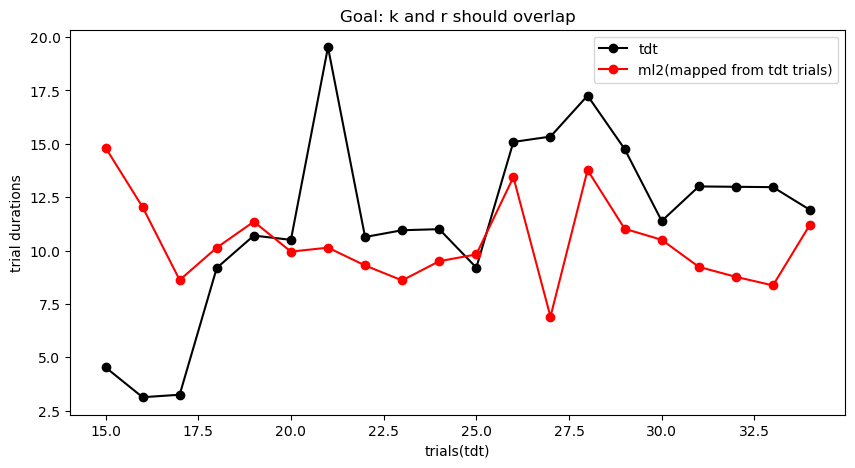

In [3]:
%matplotlib inline
animal = "Pancho"
expt = "*"

# --- DONE
# DATE = "220614" # ok
# DATE = "220630" # bad photodiode [DONE]
# DATE = "220702" # ok (bad photodiode)
# DATE = "220918" # priminvar (no done button)
# DATE = "220811" # good for preprocessing (but many trials)

# --- NOT DONE
# DATE = "221001" # preprocessing sanityc heck (fewer trials)
DATE = "221017" # preprocessing sanityc heck (fewer trials)

rec_session = 2 # sumes one-to-one mapping between neural and beh sessions.
dataset_beh_expt = None

SN = load_session_helper(DATE, dataset_beh_expt, rec_session)


## 10/4/22 - Sanity checks, getting all timings and events

##### Photodiode for timing of stroke onsets, for sequential mask

In [ ]:
# Get trial outcomes
fd, t = SN.beh_get_fd_trial(trial)
mkl.getTrialsOutcomesWrapper(fd, t)

In [ ]:
# Print the actual trial num (ml2)
fd, t = SN.beh_get_fd_trial(trial)
t

In [ ]:
# Extract beh code times
SN.behcode_extract_times(9, t)

In [ ]:
%matplotlib inline
SN.extract_reward_stream(trial, ploton=True)

In [ ]:
SN.behcode_get_stream_crossings_in_window(378, None, t_pre=0.01, t_post = 0.04, whichstream="reward", 
                    # out = self.behcode_get_stream_crossings_in_window(trial, 50, t_pre=1, t_post = 1, whichstream="reward", 
                                          ploton=True, cross_dir_to_take="up", assert_single_crossing_per_behcode_instance=False,
                                            assert_single_crossing_this_trial = False,
                                            assert_expected_direction_first_crossing = "up", 
                                            allow_no_crossing_per_behcode_instance_if=None)

In [ ]:
# Plot a single trial
%matplotlib notebook
trial = 1# , 133
SN.plotwrapper_raster_oneetrial_multsites(trial, list_sites = SN.sitegetter_all(clean=True)[:2], 
                                          overlay_trial_events=False)

In [ ]:
%matplotlib inline
# get event time using pd
trial = 500# 202#, 133
for trial in range(500,550):
    SN.events_get_time_using_photodiode(trial, list_events=["fixcue"], plot_beh_code_stream=False, overwrite=True)

In [ ]:
SN.behcode_extract_times(50, trial)

In [ ]:
SN.extract_data_tank_streams("reward", trial, True)

In [ ]:
fd, t = SN.beh_get_fd_trial(trial)
mkl.getTrialsOutcomesWrapper(fd, t)

In [ ]:

len(SN.behcode_extract_times(16))

# len(SN.get_trials_list(True))

In [ ]:
out = SN.behcode_get_stream_crossings_in_window(trial, 16, t_pre=0.5, t_post = 0.5, whichstream="touch_in_fixsquare_binary", 
                                          ploton=True, cross_dir_to_take="up", assert_single_crossing_per_behcode_instance=True,
                                            assert_single_crossing_this_trial = True,
                                             assert_expected_direction_first_crossing = "up")              


In [ ]:
# Touching in fixation window
SN.beh_extract_touch_in_fixation_square(trial, ploton=True)

In [ ]:
SN.BehTrialMapListGood

In [ ]:
for trial in SN.get_trials_list(True):
    out = SN.events_get_time_sorted(trial, ["off_stroke_last", "done_button"])[3]
    if out[0]=="done_button":
        print(trial)
    

##### [SAnity check - events timing] Categorize trials based on what events are present

In [ ]:
for trial in SN.get_trials_list(True)[60:80]:
    SN.events_get_time_using_photodiode(SN.get_trials_list(True)[trial], list_events=["on"], overwrite=True)

In [ ]:
# SANITY CEHCK FOR EVENTS
%matplotlib inline
SN.eventsdataframe_sanity_check()

In [ ]:
# OTHER STUFF.

In [ ]:
SN.events_get_time_using_photodiode_and_save()

In [ ]:
SN.EventsTimeUsingPhd = {}
SN._loadlocal_events()
display(SN.EventsTimeUsingPhd)

In [ ]:
SN._beh_get_fdnum_trial(345)

In [ ]:
SN.EventsTimeUsingPhd = {}
SN.events_get_time_using_photodiode(439, ["done_button"])

In [ ]:
SN.beh_extract_touch_in_done_button(439, ploton=True)

In [ ]:
trial = 579
%matplotlib inline
SN.plotwrapper_raster_oneetrial_multsites(trial, SN.sitegetter_all()[0:], overlay_trial_events=True)

##### Touch, as criteria for fixation onset, (and others)


In [ ]:
# 1) get timecourse of touch data

# 2) get onsets/offsets.

# 3) apply criteria for being within fixation window, etc.


##### Eye tracking


In [ ]:
list_codes = [9, 11, 16, 91, 92, 62, 73, 50]
for code in list_codes:
    sh = SN.behcode_convert(codenum=code, shorthand=True)
    print(code, sh)


##### Pupil diameter

In [ ]:
times, vals, fs = SN.extract_data_tank_streams("eyediam", SN.get_trials_list(True, True)[10], ploton=True)

times, vals, fs = SN.extract_data_tank_streams("pd2", SN.get_trials_list(True, True)[10], ploton=True)


## [before 10/4/22, sanity checks, etc]

##### Debugging loading

In [ ]:
from neuralmonkey.scripts.load_and_save_locally import load_and_preprocess_single_session
for DATE in ["220616", "220716"]:
    for rec_session in [0, 1]:
        load_and_preprocess_single_session(DATE, rec_session)

##### Check spike times match raw data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline

rs = 2
chan = 1

fig, axes = plt.subplots(2,1, figsize=(15,10))

# pick out a single chan
raw = SN.datall_slice_single(rs, chan, trial)
t = raw["tbins0"]
vals = raw["raw"]
st = raw["spike_times"]

# 1) Plot entire trial
ax = axes.flatten()[0]
ax.set_title(["rs", rs, "chan", chan])
# raw
ax.plot(t, vals)
# spikes
ax.plot(st, np.ones(st.shape), 'xr')

# 2) Plot zoomed in part of trial
# 1) Plot entire trial
ax = axes.flatten()[1]
ax.set_title('zoomed in')

# window the data
twind = [1., 1.5]
t, vals = SN.extract_windowed_data(t, twind, vals, recompute_time_rel_onset=False)
st, _ = SN.extract_windowed_data(st, twind, recompute_time_rel_onset=False)

# raw
ax.plot(t, vals)
# spikes
ax.plot(st, np.mean(vals)*np.ones(st.shape), 'xr')

print("DO THIS: filter data before plotting")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
# %matplotlib inline


fig, axes = plt.subplots(2,1, figsize=(15,10))

# pick out a single chan
import random
idx = random.randint(1, 512)
# idx = 500
D = DatAll[idx]
t = D["tbins0"]
raw = D["raw"]
st = D["spike_times"]

# raw
ax = axes.flatten()[0]
ax.plot(t, raw)
# spikes
ax.plot(st, np.ones(st.shape), 'xr')

print("DO THIS: zoom in, confirm that spike times match raw")

##### Tank and RS4 data match - compare dupl and raw

In [ ]:
# Check dupl vs. raw - uses specific trials since have not extract all raw, just trials (data size)

%matplotlib notebook
fig, axes = plt.subplots(2,1,figsize=(10,8), sharex=True)

# dup 1 (1,1)
tdup, valsdup = extract_data_tank_streams("duplicate1", trial0=trial0)
raw = datall_slice_single(2, 1, trial0)
ax = axes.flatten()[0]
ax.plot(tdup, valsdup, color='r', label="dupl")
ax.plot(raw["tbins0"], raw["raw"], color='k', label="rs4")
ax.set_title("dupl(r) and rs4 (k)")
ax.legend()

# dup 2 (1, 2)
tdup, valsdup = extract_data_tank_streams("duplicate2", trial0=trial0)
raw = datall_slice_single(3, 1, trial0)
ax = axes.flatten()[1]
ax.plot(tdup, valsdup, color='r', label="dupl")
ax.plot(raw["tbins0"], raw["raw"], color='k', label="rs4")
ax.set_title("dupl(r) and rs4 (k)")
ax.legend()
ax.set_xlabel('make sure they are aligned')


### Sanity check: check tank data for each trial

In [ ]:
SN.load_tdt_tank()

##### Testing out methods for extracting streams from tank

In [ ]:
# Loading each time snippet from server when needed

In [ ]:
# load streams, since they are not yet loaded
trial = 10
store = "PhDi"

dat = SN.datall_slice_single(2,1,trial)
time_range = dat["time_range"]
out = SN.load_tdt_tank_specific(store=store, t1=time_range[0], t2=time_range[1])

In [ ]:
time_range = [100, 66000]

In [ ]:
%%timeit
# Test two methods for loading tank streams, either entire chunk, or part by part.

# method 1: load it single time
out = SN.load_tdt_tank_specific(store=store, t1=time_range[0], t2=time_range[1])


In [ ]:
%%timeit
# Test two methods for loading tank streams, either entire chunk, or part by part.

# method 2: break into chunks
import numpy as np
edges = np.linspace(time_range[0], time_range[1], 20)
for t1, t2 in zip(edges[0:], edges[1:]):
    out = SN.load_tdt_tank_specific(store=store, t1=t1, t2=t2)



In [ ]:
# RESULTS OF TIMING FOR LOADING DATA TANK:

# time range: [100 200]
#1: 0.164
#2: 3.0

# time_range = [100, 66000]
#1: 881 ms ± 70.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
#2: 4.11 s ± 166 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# CONCLUSIO:
# Loading all is much faster then loading in chunks.
# So: load entire data in preprocess, then save to local.

##### using pre-loaded streams

In [ ]:
SN.DatTank["streams"] = SN.DatTank["epocs"]


SN.load_tdt_tank(True)

In [ ]:
times, vals  = SN.extract_data_tank_streams("pd1", 1)
plt.figure()
plt.plot(times, vals, '-k')

times, vals  = SN.extract_data_tank_streams("pd2", 1)
plt.figure()
plt.plot(times, vals, '-k')

##### Plot a single trial, overlaying spikes and streams


In [ ]:
SN.plot_specific_trial_overview(100)

In [ ]:
SN.plot_raster_multrials_onesite([10], 10)

In [ ]:
SN._load_spike_times(3,3, return_none_if_fail=False)

In [ ]:
SN.datspikes_slice_single(3,3,100)

In [ ]:
SN.plotwrapper_raster_oneetrial_multsites(100, SN.sitegetter_all(clean=True))

##### Sanity check: photodiodes

In [ ]:
list_behcode = [11, 91, 92, 71, 73]
list_whichstream = ["pd1", "pd2"]
for behcode in list_behcode:
    for whichstream in list_whichstream:
        print(behcode)
        SN.behcode_get_stream_crossings_in_window(trial, behcode, whichstream=whichstream, ploton=True)
        

##### good plot each beh code and associated photodiode crossings

In [ ]:
np.array([])

In [ ]:
SN.plot_behcode_photodiode_sanity_check()


In [ ]:
np.array([])

In [ ]:
## Plot a single example ph di crossig

trial = 0
behcode=73
stream = 'pd1'
timecross, valscross, time_behcode, valminmax, threshold = SN.behcode_get_stream_crossings_in_window(trial, behcode, whichstream=stream, cross_dir=crosdir, ploton=True, t_post=0.4)


In [ ]:
list_behcode = [11, 91, 92, 73]
trial= 0
for behcode in list_behcode:
    times = SN.behcode_extract_times(behcode, trial)
    print(times)

#### SAnity check: compare tdt to ml2 data

In [ ]:
# n trials
ntrialsT = len(t_ons)
ntrialsM = len(getIndsTrials(fd))
print(ntrialsT, ntrialsM)
assert ntrialsT==ntrialsM or ntrialsT==ntrialsM+1
print("GOOD: N trials match between ML and TDT")

In [ ]:
# 1) beh code timing
behcodes_tdt = extract_data_tank_epocs("behcode", trial0=trial0)
behcodes_ml = getTrialsBehCodes(fd, trialml)

assert all(behcodes_tdt[0] - behcodes_ml["time"] < 0.001)
assert all(behcodes_tdt[1] == behcodes_ml["num"])
print("GOOD - beh codes match in time and id")

### TDT STUFF

In [ ]:
import tdt
path = "/mnt/hopfield_data01/ltian/recordings/Pancho/220702/Pancho-220702-145450/Pancho-220702-145450"
headers = tdt.read_block(path, headers=1)


data.stores

del headers.stores["Mic1"]

headers.stores

stores_to_avoid = ["Mic1", "dup1", "dup2"]
stores = [st for st in headers.stores if st not in stores_to_avoid]

data = tdt.read_block(path, store = ["PhDi"])


data = tdt.read_block(path, store = ["PhDi"], evtype=["streams"])


data = tdt.read_block(path,  evtype=["epocs"])


data = tdt.read_block(path,  evtype=["streams"])


data = tdt.read_block(path,  evtype=["streams"], t1=0., t2=0.1)
data = tdt.read_block(path,  evtype=["streams"], t1=0., t2=0.1)


data = tdt.read_block(path, store = ["Bode"], evtype=["epocs"])


data["epocs"]

##### testing three methods for indexing into self.DatAll

In [ ]:
import pandas as pd

df = pd.DataFrame(SN.DatAll)

def test(rs, chan, trial):
    for D in SN.DatAll:
        if D["rs"]==rs and D["chan"]==chan and D["trial0"]==trial:
            spiketimes = D["spike_times"]
            return spiketimes



for rs in [2,3]:
    for chan in range(1,256):
        print(chan)
        for trial in range(1,500):
                
            # Method 1, using dataframe
            # RESULT: about 1 chan a second
            ind = (df["rs"]==rs) & (df["chan"]==chan) & (df["trial0"]==trial)
            
            # Method 2, for loop
            # VERY SLOW
            test(rs, chan, trial)
            
            # Method 3, mapper dict
            # Result: very fast (almost instant)
            SN.datall_slice_single(rs, chan, trial)